In [127]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
import pandas as pd
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/HMKMRHD.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [132]:
df = pd.read_csv('C:\\Workspace\\python\\Data_Science\\05.웹프로그래밍과 HTML, 크롤링\\YoutubeRanking.csv', encoding = 'UTF-8')
df

,카테고리,이름,구독자 수,조회수,영상 수
0,[음악/댄스/가수],BLACKPINK,6410만,190억1809만,371
1,[음악/댄스/가수],HYBE LABELS,6040만,187억3584만,654
2,[음악/댄스/가수],BANGTANTV,5650만,122억1297만,"1,579"
3,[음악/댄스/가수],SMTOWN,2850만,218억9538만,"3,729"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223
...,...,...,...,...,...
995,[게임],OGN,51만,6억0888만,"27,433"
996,[미분류],밉지않은 관종언니,51만,6795만,170
997,[게임],미소,51만,2억1078만,"3,084"
998,[음식/요리/레시피],Muggo,51만,1억8372만,"1,388"


In [133]:
def str2int(x):
    return int(x.replace(',', ''))
for i in range(len(df['영상 수'])):
    if type(df['영상 수'][i]) == str:
        df['영상 수'][i] = str2int(df['영상 수'][i])
def change(x):
    x = x.replace('만', '0000')
    x = x.replace('억', '')
    return x
change(df['구독자 수'][0])

'64100000'

In [134]:
for i in range(len(df['구독자 수'])):
    df['구독자 수'][i]= change(df['구독자 수'][i])
    df['조회수'][i]= change(df['조회수'][i])
    if type(df['구독자 수'][i]) == str:
        df['구독자 수'][i] = str2int(df['구독자 수'][i])
        df['조회수'][i] = str2int(df['조회수'][i])       
df 

,카테고리,이름,구독자 수,조회수,영상 수
0,[음악/댄스/가수],BLACKPINK,64100000,19018090000,371
1,[음악/댄스/가수],HYBE LABELS,60400000,18735840000,654
2,[음악/댄스/가수],BANGTANTV,56500000,12212970000,1579
3,[음악/댄스/가수],SMTOWN,28500000,21895380000,3729
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],26500000,11052880000,223
...,...,...,...,...,...
995,[게임],OGN,510000,608880000,27433
996,[미분류],밉지않은 관종언니,510000,67950000,170
997,[게임],미소,510000,210780000,3084
998,[음식/요리/레시피],Muggo,510000,183720000,1388


In [135]:
df.sort_values(by='영상 수', ascending=False).head(10)

,카테고리,이름,구독자 수,조회수,영상 수
154,[뉴스/정치/사회],YTN news,2500000,5462390000,553462
706,[뉴스/정치/사회],연합뉴스TV,700000,918130000,362555
59,[TV/방송],SBS Drama,5480000,5750870000,340878
56,[TV/방송],SBS Entertainment,5720000,6664750000,216725
337,[뉴스/정치/사회],KBS News,1320000,1844530000,176159
968,[뉴스/정치/사회],Arirang News,530000,237800000,123984
244,[뉴스/정치/사회],JTBC News,1710000,2409660000,116553
290,[뉴스/정치/사회],MBCNEWS,1500000,3383580000,115414
112,[TV/방송],KBS Drama,3470000,4261110000,114095
230,[뉴스/정치/사회],SBS 뉴스,1780000,2672520000,111308


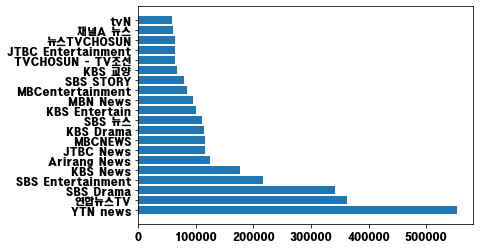

In [138]:
df2 = df.sort_values(by='영상 수', ascending = False).head(20)

plt.barh(df2['이름'], df2['영상 수'])
plt.show()

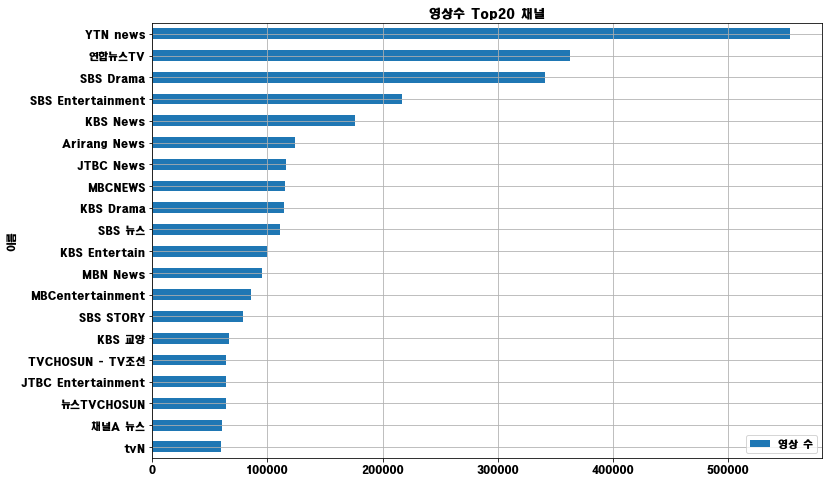

In [141]:
df2 = df[['이름', '영상 수']].sort_values(by='영상 수', ascending=False)
df2.set_index('이름', inplace=True)
df2.head(20).sort_values(by='영상 수').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('영상수 Top20 채널')
plt.show()

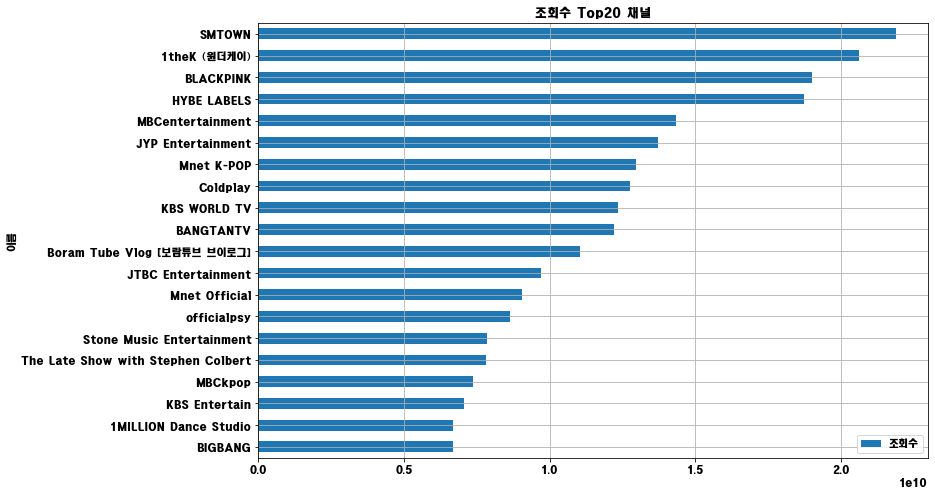

In [145]:
df2 = df[['이름', '조회수']].sort_values(by='조회수', ascending=False)
df2.set_index('이름', inplace=True)
df2.head(20).sort_values(by='조회수').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('조회수 Top20 채널')
plt.show()

In [175]:
category_count = df['카테고리'].value_counts().to_frame()
category_count
df[['카테고리', '이름']].groupby('카테고리').count()
category_count.columns = ['채널 수']
category_count

,채널 수
[음악/댄스/가수],171
[TV/방송],146
[미분류],114
[키즈/어린이],88
[음식/요리/레시피],85
[게임],74
[BJ/인물/연예인],71
[뉴스/정치/사회],53
[패션/미용],44
[취미/라이프],38


In [211]:
df2 = df[['카테고리', '구독자 수']].groupby('카테고리').agg(['count', 'sum'])
df2.columns = ['채널 수', '구독자 수_합계']
df2.sort_values(by = '구독자 수_합계', ascending = False, inplace = True)
df2.reset_index(inplace = True)
df2

,카테고리,채널 수,구독자 수_합계
0,[음악/댄스/가수],171,674550000
1,[키즈/어린이],88,257790000
2,[TV/방송],146,229800000
3,[음식/요리/레시피],85,180620000
4,[미분류],114,143460000
5,[BJ/인물/연예인],71,97610000
6,[뉴스/정치/사회],53,71050000
7,[게임],74,67170000
8,[취미/라이프],38,47890000
9,[패션/미용],44,44380000


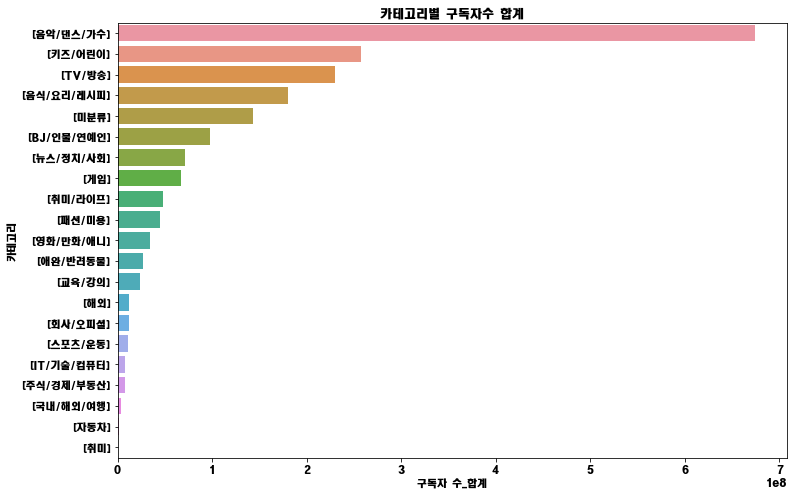

In [212]:
import seaborn as sns
df2.set_index('카테고리', inplace=True)
plt.figure(figsize = (12, 8))
sns.barplot(x = '구독자 수_합계', y = df2.index, data = df2)
plt.title('카테고리별 구독자수 합계')
plt.show()